In [1]:
import pandas as pd
import numpy as np
import spacy

In [2]:
nlp = spacy.load('en_core_web_lg')

In [4]:
true = pd.read_csv('True.csv')
false = pd.read_csv('Fake.csv')

In [8]:
true.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [11]:
false.head()

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [10]:
true['category'] = 1
false['category'] = 0

In [12]:
df = pd.concat([true,false])

In [14]:
df.tail()

,title,text,subject,date,category
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [17]:
import sys

In [18]:
!{sys.executable} -m pip install seaborn

In [19]:
import seaborn as sns

In [23]:
sns.set_style('darkgrid')

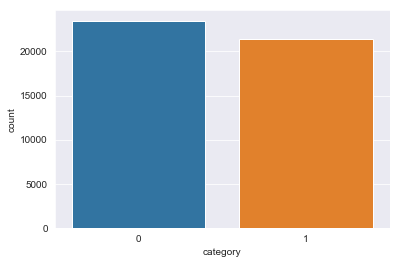

In [24]:
sns.countplot(df.category)

In [25]:
df.isnull().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [26]:
df.title.count()

44898

In [27]:
df.shape

(44898, 5)

In [30]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [32]:
import matplotlib.pyplot as plt

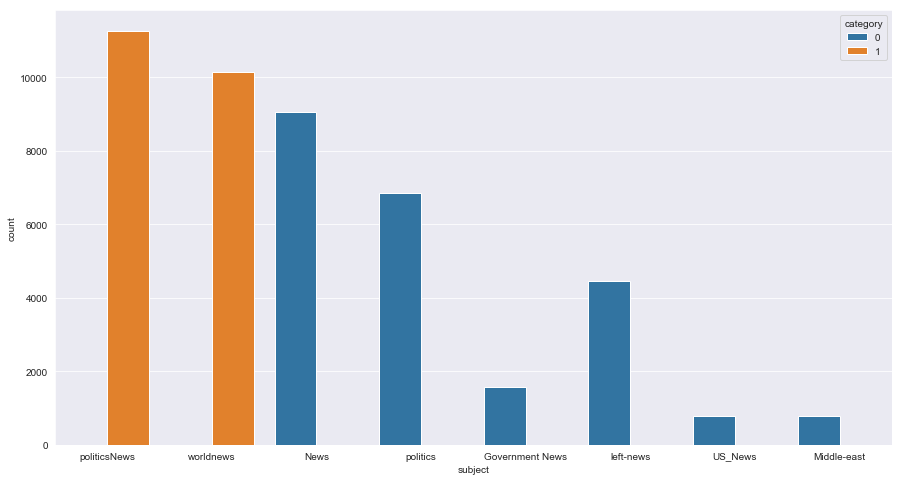

In [33]:
plt.figure(figsize=(15,8))
sns.countplot(x="subject", hue="category", data=df)

In [34]:
df['text'] = df['text'] + " " + df['title']

In [38]:
df = df.drop(['title','subject','date'], axis=1)

In [39]:
df.head()

,text,category
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [121]:
all_stopwords = nlp.Defaults.stop_words

In [87]:
cp1 = df.copy()

In [147]:
import string,re

In [149]:
from bs4 import BeautifulSoup

In [148]:
!{sys.executable} -m pip install bs4

  Running setup.py bdist_wheel for bs4: started
  Running setup.py bdist_wheel for bs4: finished with status 'done'
  Stored in directory: C:\Users\Gaurav\AppData\Local\pip\Cache\wheels\a0\b0\b2\4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


In [150]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [152]:
def remove_between_square_brackets(text):
    return re.sub("\[[^]]*\]","",text)

def remove_between_square_brackets(text):
    return re.sub(r"http\S+", "",text)

In [153]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in all_stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

In [155]:
def denoise_data(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

In [157]:
df['text'] = df['text'].apply(denoise_data)

In [158]:
df.head()

,text,category
0,WASHINGTON Reuters head conservative Republica...,1
1,WASHINGTON Reuters Transgender people allowed ...,1
2,WASHINGTON Reuters special counsel investigati...,1
3,WASHINGTON Reuters Trump campaign adviser Geor...,1
4,SEATTLE WASHINGTON Reuters President Donald Tr...,1


In [159]:
!{sys.executable} -m pip install wordcloud

In [160]:
from wordcloud import WordCloud

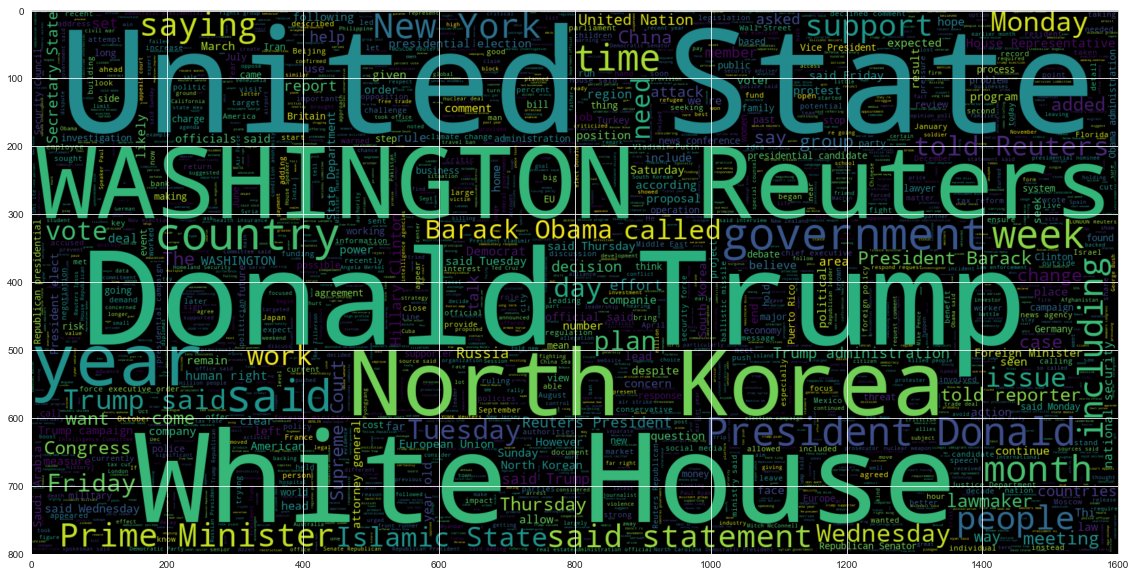

In [163]:
plt.figure(figsize=(20,10))
wc = WordCloud(max_words=2000,width=1600,height=800).generate(" ".join(df[df['category'] == 1].text))
plt.imshow(wc,interpolation='bilinear')

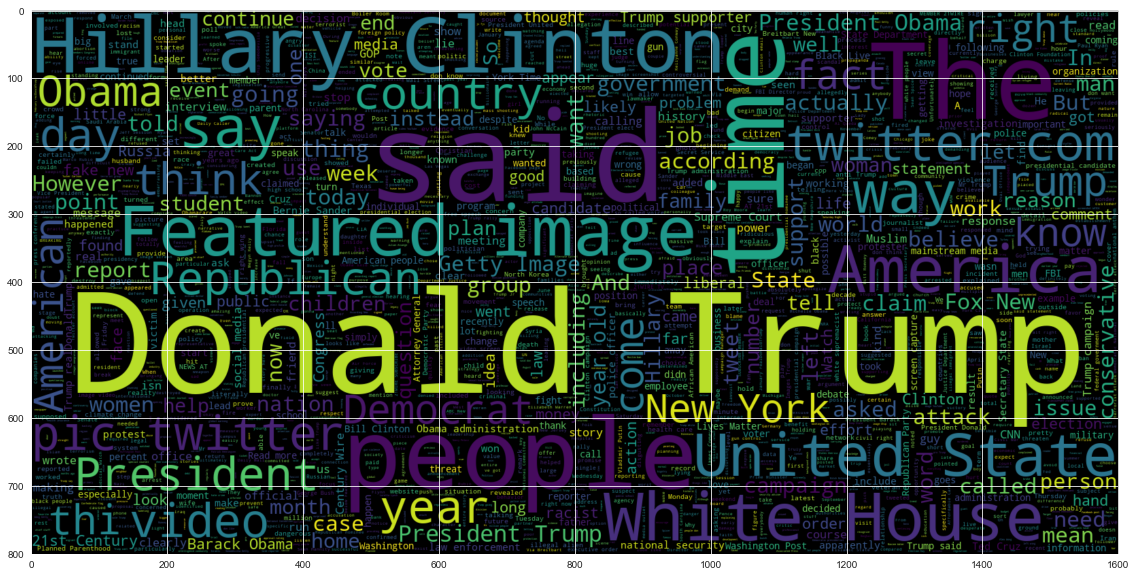

In [164]:
plt.figure(figsize=(20,10))
wc = WordCloud(max_words=2000,width=1600,height=800).generate(" ".join(df[df['category'] == 0].text))
plt.imshow(wc,interpolation='bilinear')

Text(0.5, 1.0, 'Fake News')

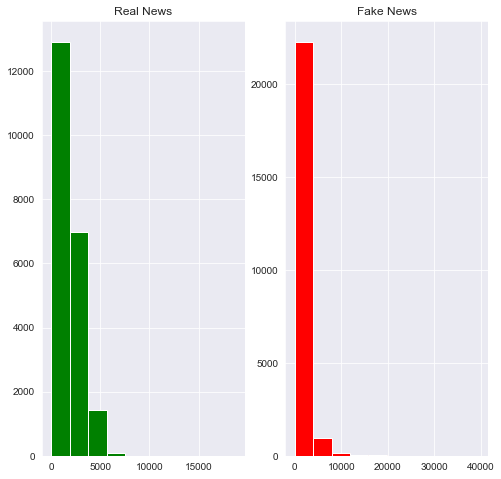

In [175]:
plt.figure(figsize=(8,8))
plt.subplot(121)
text_len = df[df['category'] == 1]['text'].str.len()
plt.hist(text_len,color='green')
plt.title('Real News')
plt.subplot(122)
text_len = df[df['category'] == 0]['text'].str.len()
plt.hist(text_len,color='red')
plt.title('Fake News')

C:\Users\Gaurav\Anaconda3\envs\nlp_course\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Gaurav\Anaconda3\envs\nlp_course\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Fake News')

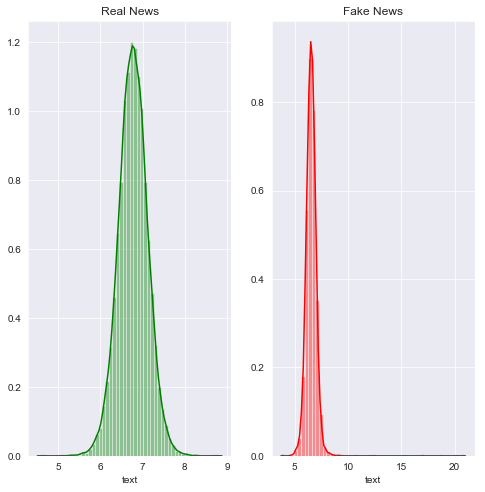

In [178]:
plt.figure(figsize=(8,8))
plt.subplot(121)
word = df[df['category'] == 1]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),color='green')
plt.title('Real News')
plt.subplot(122)
word = df[df['category'] == 0]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),color='red')
plt.title('Fake News')

In [179]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.text)

In [180]:
corpus[:5]

['WASHINGTON', 'Reuters', 'head', 'conservative', 'Republican']

In [181]:
from collections import Counter

In [182]:
counter = Counter(corpus)
most_common = counter.most_common(10)

In [183]:
most_common

[('s', 172260),
 ('Trump', 111601),
 ('said', 93236),
 ('U.S.', 50442),
 ('t', 41974),
 ('President', 33181),
 ('people', 33122),
 ('Donald', 27795),
 ('said.', 26129),
 ('Republican', 23937)]

In [184]:
from sklearn.feature_extraction.text import CountVectorizer

In [187]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g,g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_of_words = bag_of_words.sum(axis=0)
    word_freq = [(word,sum_of_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq,key=lambda x: x[1],reverse=True)
    return word_freq[:n]

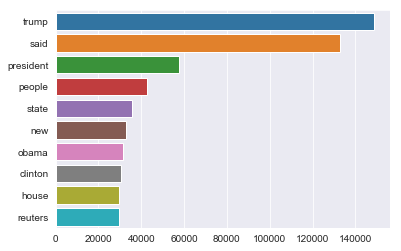

In [188]:
#Unigram analysis
most_common_uni = get_top_text_ngrams(df.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()))

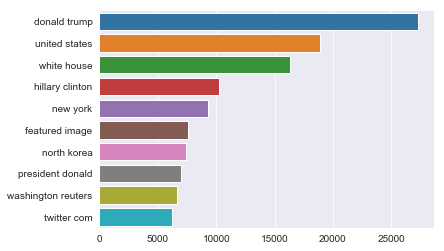

In [189]:
#bigram analysis
most_common_bi = get_top_text_ngrams(df.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()), y=list(most_common_bi.keys()))

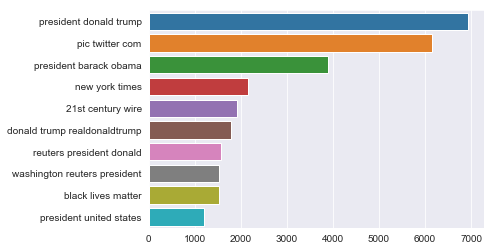

In [191]:
#trigram analysis
most_common_tri = get_top_text_ngrams(df.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()), y=list(most_common_tri.keys()))

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X_train,X_test,y_train,y_test = train_test_split(df.text,df.category,test_size = 0.2,random_state = 0)

In [203]:
from keras.preprocessing.text import Tokenizer

In [204]:
max_features = 10000
maxlen = 300

In [205]:
tokenizer = Tokenizer(num_words=max_features)

In [207]:
tokenizer.fit_on_texts(X_train)

In [208]:
tokenized_train = tokenizer.texts_to_sequences(X_train)

In [210]:
from keras.preprocessing import sequence

In [211]:
X_train = sequence.pad_sequences(tokenized_train,maxlen=maxlen)

In [212]:
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = sequence.pad_sequences(tokenized_test,maxlen=maxlen)

In [214]:
EMBEDDING_FILE = 'glove.twitter.27B.100d.txt'

In [216]:
def get_coefs(word,*arr):
    return word, np.asanyarray(arr,dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE,encoding='utf8'))

In [219]:
all_embs = np.stack(embeddings_index.values())

In [222]:
embs_mean, embs_std = all_embs.mean(), all_embs.std()

In [224]:
embs_size = all_embs.shape[1]

In [225]:
word_index = tokenizer.word_index

In [227]:
nb_words = min(max_features,len(word_index))

In [229]:
nb_words,embs_size

(10000, 100)

In [230]:
embeddding_matrix = embeddding_matrix = np.random.normal(embs_mean,embs_std,(nb_words,embs_size))

In [234]:
for word,i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddding_matrix[i] = embedding_vector

In [235]:
batch_size = 256
epochs = 10
embed_size = 100

In [236]:
from keras.callbacks import ReduceLROnPlateau

In [237]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5,min_lr=0.00001)

In [238]:
#Training Model
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout

In [241]:
model = Sequential()
#Embedded layer
model.add(Embedding(max_features,output_dim=embs_size,weights=[embeddding_matrix], input_length = maxlen,trainable=False))
#LSTM layer
model.add(LSTM(units=128,return_sequences=True,recurrent_dropout=0.25,dropout=0.25))
model.add(LSTM(units=64,recurrent_dropout=0.1,dropout=0.1))

model.add(Dense(units=32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [242]:
from keras.optimizers import Adam

In [243]:
model.compile(optimizer=Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [244]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 300, 128)          117248    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [245]:
history = model.fit(X_train,y_train,batch_size=batch_size,validation_data=(X_test,y_test),epochs=epochs,callbacks=[learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Train on 35918 samples, validate on 8980 samples
Epoch 1/10
35918/35918 [==============================] - ETA: 1:26:01 - loss: 0.6982 - acc: 0.46 - ETA: 47:42 - loss: 0.7016 - acc: 0.5117 - ETA: 34:50 - loss: 0.7612 - acc: 0.50 - ETA: 28:21 - loss: 0.7370 - acc: 0.51 - ETA: 23:49 - loss: 0.7106 - acc: 0.57 - ETA: 20:49 - loss: 0.6758 - acc: 0.61 - ETA: 18:36 - loss: 0.6495 - acc: 0.64 - ETA: 17:03 - loss: 0.6377 - acc: 0.65 - ETA: 15:44 - loss: 0.6016 - acc: 0.68 - ETA: 14:40 - loss: 0.5814 - acc: 0.69 - ETA: 13:46 - loss: 0.5611 - acc: 0.71 - ETA: 13:00 - loss: 0.5406 - acc: 0.72 - ETA: 12:26 - loss: 0.5211 - acc: 0.73 - ETA: 11:54 - loss: 0.5028 - acc: 0.75 - ETA: 11:24 - loss: 0.4850 - acc: 0.76 - ETA: 10:59 - loss: 0.4741 - acc: 0.76 - ETA: 10:38 - loss: 0.4610 - acc: 0.77 - ETA: 10:18 - loss: 0.4506 - acc: 0.78 - ETA: 10:03 - loss: 0.4365 - acc: 0.79 - ETA: 9:47 - loss: 0.4274 - acc: 0.7967 - ETA: 9:32 - loss: 0.4186 - acc: 0.801 - 

C:\Users\Gaurav\Anaconda3\envs\nlp_course\lib\site-packages\keras\callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_accuracy` which is not available. Available metrics are: val_loss,val_acc,loss,acc,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/10
35918/35918 [==============================] - ETA: 9:58 - loss: 0.0368 - acc: 0.988 - ETA: 7:49 - loss: 0.0778 - acc: 0.980 - ETA: 7:00 - loss: 0.0853 - acc: 0.977 - ETA: 6:36 - loss: 0.0822 - acc: 0.975 - ETA: 6:37 - loss: 0.0737 - acc: 0.979 - ETA: 6:36 - loss: 0.0745 - acc: 0.979 - ETA: 6:23 - loss: 0.0680 - acc: 0.981 - ETA: 6:12 - loss: 0.0681 - acc: 0.979 - ETA: 6:04 - loss: 0.0674 - acc: 0.980 - ETA: 6:01 - loss: 0.0625 - acc: 0.982 - ETA: 6:05 - loss: 0.0601 - acc: 0.982 - ETA: 6:04 - loss: 0.0609 - acc: 0.981 - ETA: 6:03 - loss: 0.0580 - acc: 0.982 - ETA: 6:01 - loss: 0.0587 - acc: 0.982 - ETA: 5:58 - loss: 0.0573 - acc: 0.982 - ETA: 6:00 - loss: 0.0560 - acc: 0.982 - ETA: 6:00 - loss: 0.0546 - acc: 0.982 - ETA: 5:57 - loss: 0.0538 - acc: 0.982 - ETA: 5:57 - loss: 0.0526 - acc: 0.982 - ETA: 5:58 - loss: 0.0511 - acc: 0.983 - ETA: 5:58 - loss: 0.0516 - acc: 0.982 - ETA: 5:54 - loss: 0.0509 - acc: 0.982 - ETA: 5:49 - loss: 0.0515 - acc: 0.982 - ETA: 5:45 - loss: 0.05

35918/35918 [==============================] - ETA: 7:21 - loss: 0.0017 - acc: 1.000 - ETA: 7:06 - loss: 0.0139 - acc: 0.994 - ETA: 6:56 - loss: 0.0151 - acc: 0.993 - ETA: 7:09 - loss: 0.0124 - acc: 0.995 - ETA: 7:01 - loss: 0.0122 - acc: 0.994 - ETA: 6:54 - loss: 0.0105 - acc: 0.995 - ETA: 6:48 - loss: 0.0139 - acc: 0.994 - ETA: 6:43 - loss: 0.0133 - acc: 0.994 - ETA: 6:47 - loss: 0.0136 - acc: 0.994 - ETA: 6:43 - loss: 0.0153 - acc: 0.994 - ETA: 6:37 - loss: 0.0154 - acc: 0.994 - ETA: 6:33 - loss: 0.0161 - acc: 0.993 - ETA: 6:29 - loss: 0.0151 - acc: 0.994 - ETA: 6:29 - loss: 0.0143 - acc: 0.994 - ETA: 6:26 - loss: 0.0141 - acc: 0.994 - ETA: 6:23 - loss: 0.0161 - acc: 0.994 - ETA: 6:19 - loss: 0.0166 - acc: 0.994 - ETA: 6:15 - loss: 0.0168 - acc: 0.994 - ETA: 6:14 - loss: 0.0163 - acc: 0.994 - ETA: 6:11 - loss: 0.0175 - acc: 0.994 - ETA: 6:09 - loss: 0.0175 - acc: 0.994 - ETA: 6:05 - loss: 0.0171 - acc: 0.994 - ETA: 6:01 - loss: 0.0179 - acc: 0.994 - ETA: 5:58 - loss: 0.0175 - acc: 0

35918/35918 [==============================] - ETA: 7:03 - loss: 0.0110 - acc: 0.996 - ETA: 6:48 - loss: 0.0167 - acc: 0.992 - ETA: 6:46 - loss: 0.0146 - acc: 0.993 - ETA: 6:48 - loss: 0.0122 - acc: 0.994 - ETA: 6:56 - loss: 0.0121 - acc: 0.993 - ETA: 6:51 - loss: 0.0179 - acc: 0.991 - ETA: 6:47 - loss: 0.0158 - acc: 0.992 - ETA: 6:44 - loss: 0.0145 - acc: 0.993 - ETA: 6:38 - loss: 0.0144 - acc: 0.993 - ETA: 6:38 - loss: 0.0143 - acc: 0.993 - ETA: 6:37 - loss: 0.0165 - acc: 0.992 - ETA: 6:33 - loss: 0.0156 - acc: 0.993 - ETA: 6:28 - loss: 0.0175 - acc: 0.992 - ETA: 6:24 - loss: 0.0175 - acc: 0.993 - ETA: 6:21 - loss: 0.0170 - acc: 0.993 - ETA: 6:21 - loss: 0.0172 - acc: 0.993 - ETA: 6:16 - loss: 0.0165 - acc: 0.993 - ETA: 6:13 - loss: 0.0166 - acc: 0.993 - ETA: 6:08 - loss: 0.0169 - acc: 0.993 - ETA: 6:05 - loss: 0.0166 - acc: 0.993 - ETA: 6:05 - loss: 0.0161 - acc: 0.993 - ETA: 6:01 - loss: 0.0157 - acc: 0.994 - ETA: 5:58 - loss: 0.0156 - acc: 0.994 - ETA: 5:54 - loss: 0.0160 - acc: 0

35918/35918 [==============================] - ETA: 4:44 - loss: 0.0031 - acc: 1.000 - ETA: 4:46 - loss: 0.0033 - acc: 1.000 - ETA: 4:49 - loss: 0.0094 - acc: 0.996 - ETA: 4:46 - loss: 0.0116 - acc: 0.996 - ETA: 4:59 - loss: 0.0095 - acc: 0.996 - ETA: 5:05 - loss: 0.0083 - acc: 0.997 - ETA: 4:57 - loss: 0.0081 - acc: 0.997 - ETA: 4:52 - loss: 0.0078 - acc: 0.997 - ETA: 4:47 - loss: 0.0077 - acc: 0.997 - ETA: 4:44 - loss: 0.0087 - acc: 0.996 - ETA: 4:40 - loss: 0.0092 - acc: 0.996 - ETA: 4:36 - loss: 0.0092 - acc: 0.996 - ETA: 4:37 - loss: 0.0095 - acc: 0.996 - ETA: 4:34 - loss: 0.0094 - acc: 0.996 - ETA: 4:31 - loss: 0.0090 - acc: 0.996 - ETA: 4:28 - loss: 0.0103 - acc: 0.996 - ETA: 4:25 - loss: 0.0107 - acc: 0.996 - ETA: 4:22 - loss: 0.0104 - acc: 0.996 - ETA: 4:19 - loss: 0.0101 - acc: 0.996 - ETA: 4:16 - loss: 0.0101 - acc: 0.996 - ETA: 4:16 - loss: 0.0097 - acc: 0.996 - ETA: 4:14 - loss: 0.0094 - acc: 0.996 - ETA: 4:11 - loss: 0.0091 - acc: 0.996 - ETA: 4:09 - loss: 0.0087 - acc: 0

35918/35918 [==============================] - ETA: 4:54 - loss: 0.0042 - acc: 1.000 - ETA: 5:04 - loss: 0.0120 - acc: 0.998 - ETA: 5:09 - loss: 0.0117 - acc: 0.997 - ETA: 5:00 - loss: 0.0118 - acc: 0.997 - ETA: 4:53 - loss: 0.0134 - acc: 0.996 - ETA: 4:48 - loss: 0.0144 - acc: 0.994 - ETA: 4:44 - loss: 0.0128 - acc: 0.995 - ETA: 4:40 - loss: 0.0116 - acc: 0.996 - ETA: 4:35 - loss: 0.0105 - acc: 0.996 - ETA: 4:40 - loss: 0.0100 - acc: 0.996 - ETA: 4:37 - loss: 0.0096 - acc: 0.996 - ETA: 4:34 - loss: 0.0098 - acc: 0.996 - ETA: 4:30 - loss: 0.0103 - acc: 0.996 - ETA: 4:27 - loss: 0.0098 - acc: 0.996 - ETA: 4:24 - loss: 0.0098 - acc: 0.996 - ETA: 4:21 - loss: 0.0096 - acc: 0.996 - ETA: 4:19 - loss: 0.0092 - acc: 0.997 - ETA: 4:20 - loss: 0.0115 - acc: 0.996 - ETA: 4:17 - loss: 0.0114 - acc: 0.996 - ETA: 4:14 - loss: 0.0109 - acc: 0.996 - ETA: 4:12 - loss: 0.0109 - acc: 0.996 - ETA: 4:09 - loss: 0.0113 - acc: 0.996 - ETA: 4:07 - loss: 0.0111 - acc: 0.996 - ETA: 4:06 - loss: 0.0108 - acc: 0

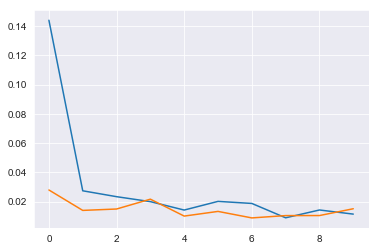

In [251]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [254]:
pred = model.predict_classes(X_test)

In [255]:
pred[:5]

array([[0],
       [0],
       [0],
       [0],
       [1]])

In [256]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [261]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred,target_names=['Fake','Not Fake']))

0.9961024498886414
[[4667    3]
 [  32 4278]]
              precision    recall  f1-score   support

        Fake       0.99      1.00      1.00      4670
    Not Fake       1.00      0.99      1.00      4310

   micro avg       1.00      1.00      1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

